In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from random import randrange,uniform
from sklearn.metrics import r2_score
from scipy import stats

In [2]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [3]:
pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

  Using cached https://github.com/pandas-profiling/pandas-profiling/archive/master.zip


# EXPLORATORY DATA ANALYSIS

In [4]:
import pandas as pd
Data_Day = pd.read_csv (r'/content/gdrive/MyDrive/Colab Notebooks/Telecom_customer_churn.csv')
Data_Day

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [5]:
import pandas_profiling

In [6]:
report = pandas_profiling.ProfileReport(Data_Day)
report ## Refer the various sections & Toggle the deatils for more insight.

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [7]:
Data_Day.info

<bound method DataFrame.info of       customerID  gender  SeniorCitizen  ... MonthlyCharges TotalCharges  Churn
0     7590-VHVEG  Female              0  ...          29.85        29.85     No
1     5575-GNVDE    Male              0  ...          56.95       1889.5     No
2     3668-QPYBK    Male              0  ...          53.85       108.15    Yes
3     7795-CFOCW    Male              0  ...          42.30      1840.75     No
4     9237-HQITU  Female              0  ...          70.70       151.65    Yes
...          ...     ...            ...  ...            ...          ...    ...
7038  6840-RESVB    Male              0  ...          84.80       1990.5     No
7039  2234-XADUH  Female              0  ...         103.20       7362.9     No
7040  4801-JZAZL  Female              0  ...          29.60       346.45     No
7041  8361-LTMKD    Male              1  ...          74.40        306.6    Yes
7042  3186-AJIEK    Male              0  ...         105.65       6844.5     No

[7043 r

In [8]:
Data_Day.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [9]:
#unique values present in each variable
Data_Day.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

# DATA PRE PROCESSING

In [10]:
!pip install klib

In [11]:
import klib

In [12]:
import klib
klib.missingval_plot(Data_Day)

No missing values found in the dataset.


In [13]:
# Check NA Values
Data_Day.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [14]:
#columns 
Data_Day.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

Since Loan ID is not going to add value to further EDA & predctions therefore it need to be dropped as variable here.

In [15]:
Data_Day.drop(['customerID'], axis='columns', inplace = True)
Data_Day

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [16]:
Data_Day.nunique()

gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [17]:
Data_Day.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [18]:
#Defining numeric and categorical variables and saving in specific array
numeric_var = ['tenure', 'MonthlyCharges', 'TotalCharges']
categorical_var = ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 
                   'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']

In [19]:
Data_Day['TotalCharges'] = pd.to_numeric(Data_Day['TotalCharges'],errors='coerce')
Data_Day

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [20]:
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline

tenure


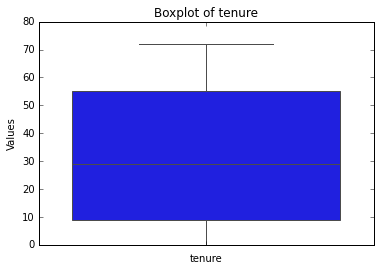

MonthlyCharges


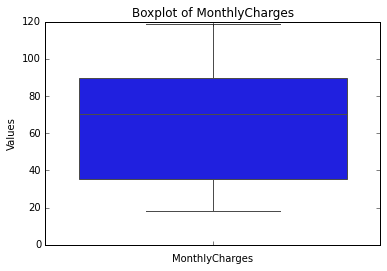

TotalCharges


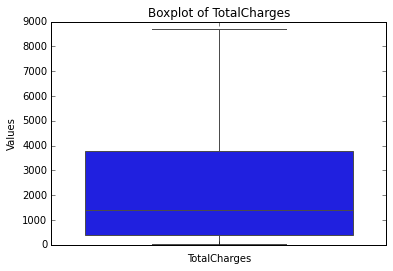

In [21]:
for i in numeric_var:
    print(i)
    sns.boxplot(y = Data_Day[i])
    plt.xlabel(i)
    plt.ylabel("Values")
    plt.title("Boxplot of " + i)
    plt.show()

In [22]:
# Encode Categorical Columns
categorical_var = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 
                   'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
Data_Day[categorical_var] = Data_Day[categorical_var].apply(le.fit_transform)
Data_Day

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1990.50,0
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,7362.90,0
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,346.45,0
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,306.60,1


In [23]:
#Outlier analysis

In [24]:
# Identify outliers
#calculate Inner Fence, Outer Fence, and IQR

for i in numeric_var:
    print(i)
    q75, q25 = np.percentile(Data_Day.loc[:,i], [75, 25])
    iqr = q75 - q25
    Innerfence = q25 - (iqr*1.5)
    Upperfence = q75 + (iqr*1.5)
    print("Innerfence= "+str(Innerfence))
    print("Upperfence= "+str(Upperfence)) 
    print("IQR ="+str(iqr))

# replace outliers with NA
    Data_Day.loc[Data_Day[i]<Innerfence, i] = np.nan
    Data_Day.loc[Data_Day[i]>Upperfence, i] = np.nan

tenure
Innerfence= -60.0
Upperfence= 124.0
IQR =46.0
MonthlyCharges
Innerfence= -46.02499999999999
Upperfence= 171.375
IQR =54.349999999999994
TotalCharges
Innerfence= nan
Upperfence= nan
IQR =nan


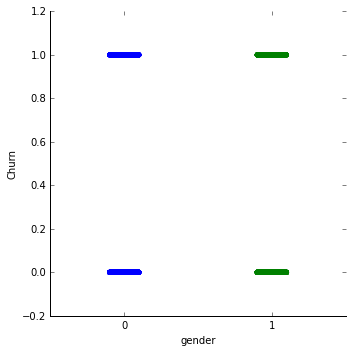

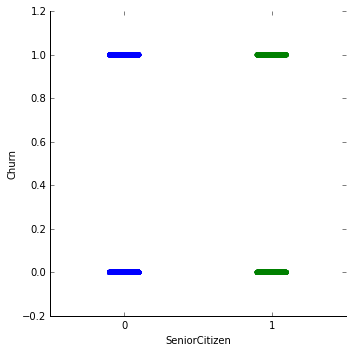

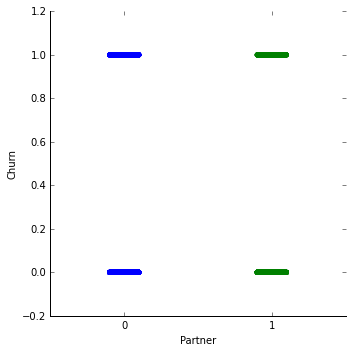

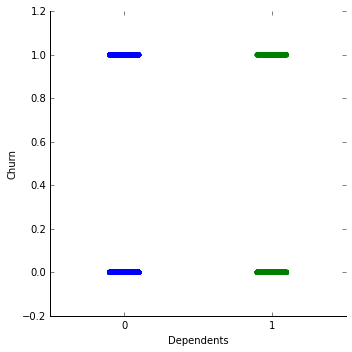

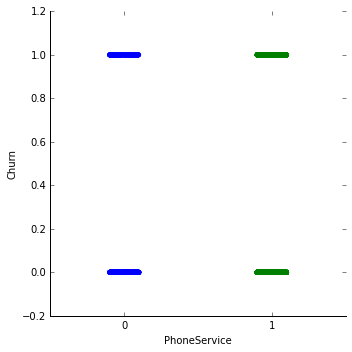

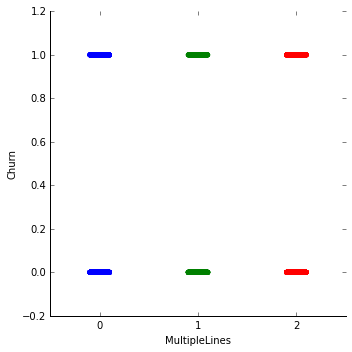

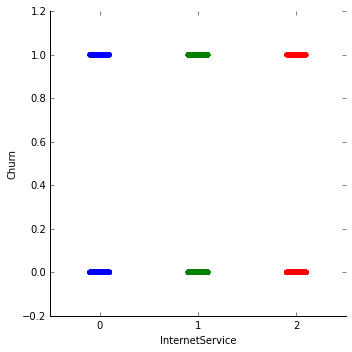

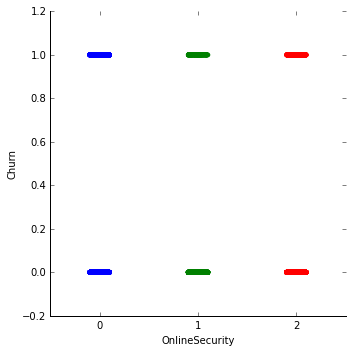

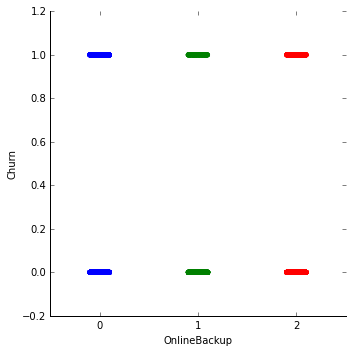

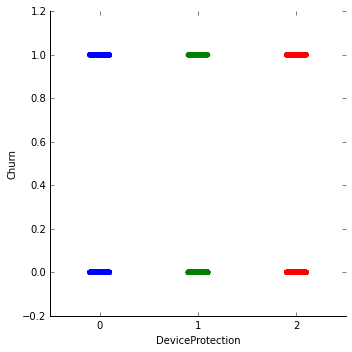

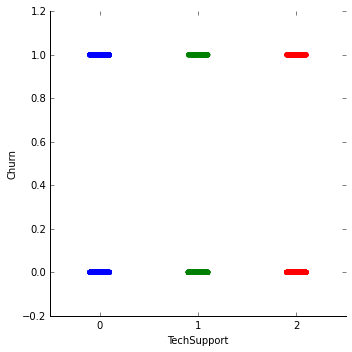

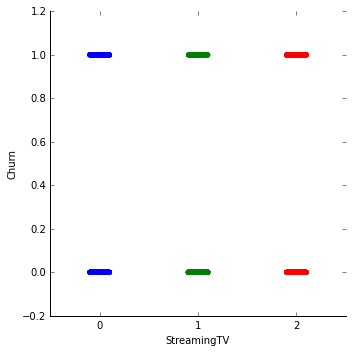

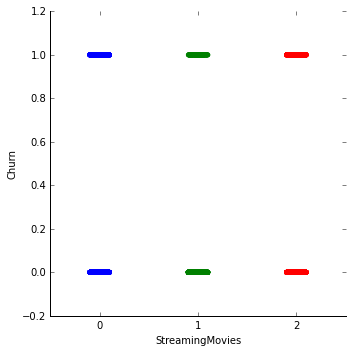

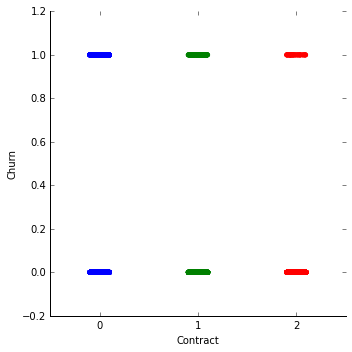

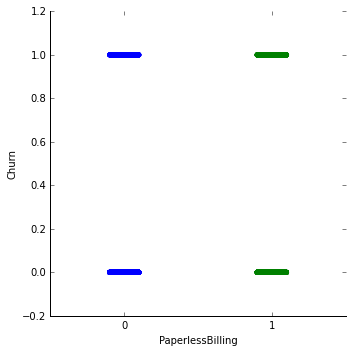

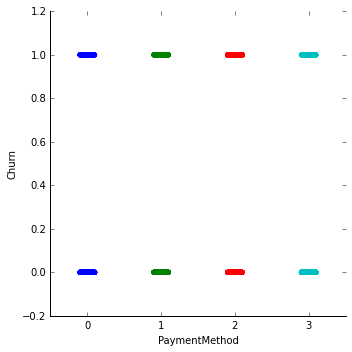

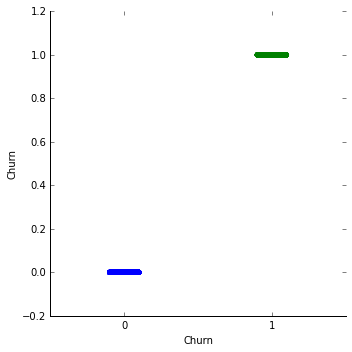

In [25]:
for i in categorical_var:
  sns.catplot(x = i, y = 'Churn', data=Data_Day, linewidths=.15)

                    gender  SeniorCitizen  ...  TotalCharges     Churn
gender            1.000000      -0.001874  ...      0.000048 -0.008612
SeniorCitizen    -0.001874       1.000000  ...      0.102411  0.150889
Partner          -0.001808       0.016479  ...      0.319072 -0.150448
Dependents        0.010517      -0.211185  ...      0.064653 -0.164221
tenure            0.005106       0.016567  ...      0.825880 -0.352229
PhoneService     -0.006488       0.008576  ...      0.113008  0.011942
MultipleLines    -0.006739       0.146185  ...      0.453202  0.038037
InternetService  -0.000863      -0.032310  ...     -0.175691 -0.047291
OnlineSecurity   -0.015017      -0.128221  ...      0.254473 -0.289309
OnlineBackup     -0.012057      -0.013632  ...      0.375556 -0.195525
DeviceProtection  0.000549      -0.021398  ...      0.389066 -0.178134
TechSupport      -0.006825      -0.151268  ...      0.276890 -0.282492
StreamingTV      -0.006421       0.030776  ...      0.392472 -0.036581
Stream

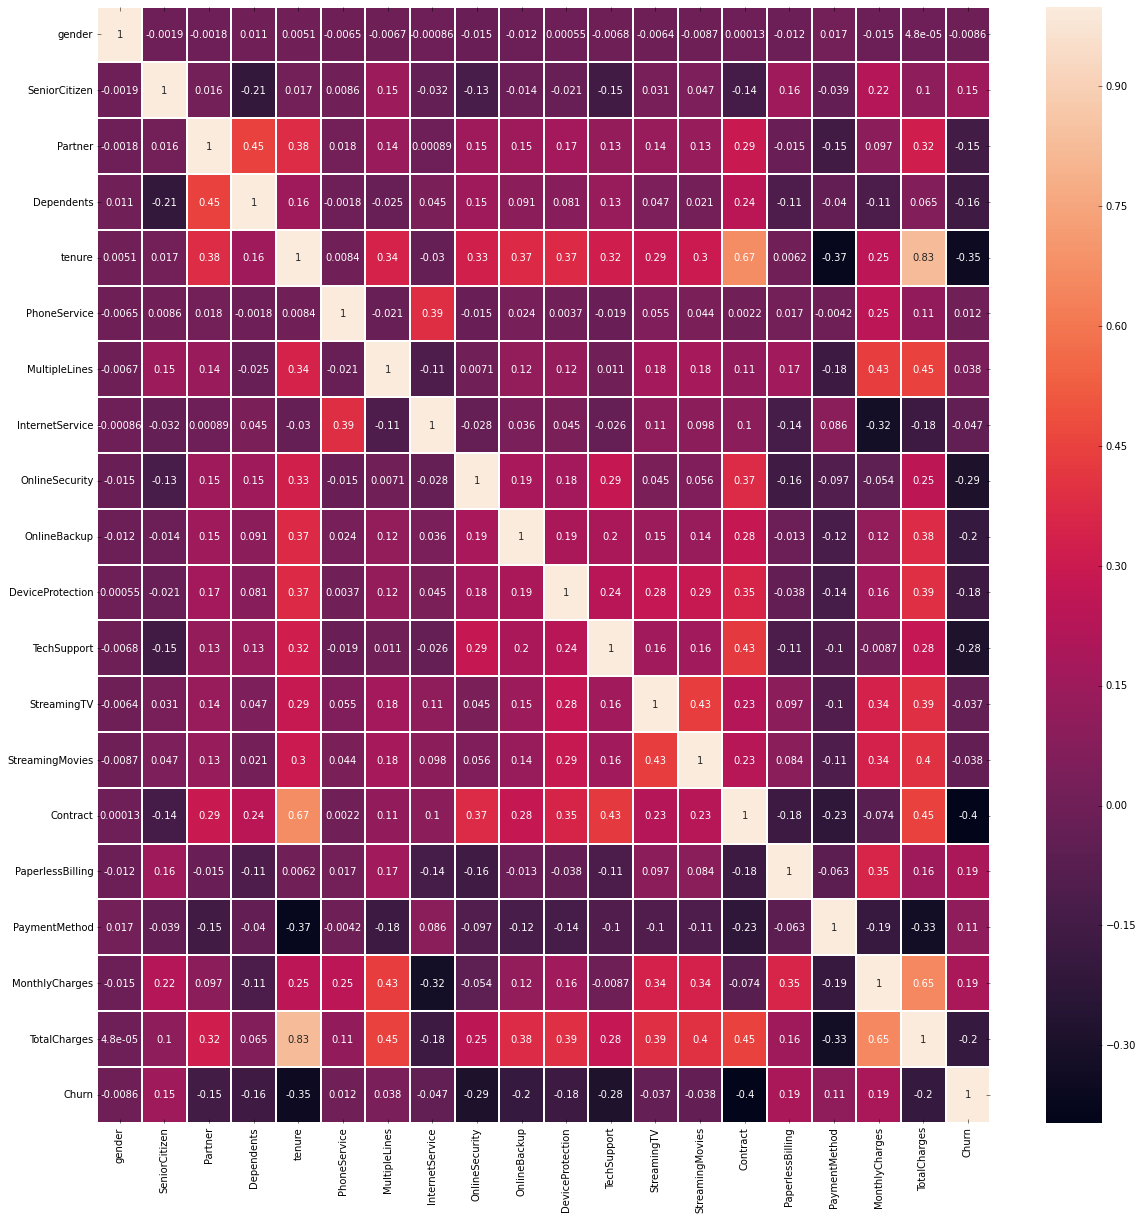

In [26]:
#Feature engineering
# Correlation Analysis and Anova test to find varaibles which can be excluded
var = ['gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']
Data_Day_cor = Data_Day.loc[:, var]
correlation_result = Data_Day_cor.corr()
print(correlation_result)
fig, ax = plt.subplots(figsize=(20,20)) ##To plot the heatmap into our required size
heatmap = sns.heatmap(correlation_result, annot=True, linewidths=1)

Displaying positive correlations. Specify a positive "threshold" to limit the results further.
Displaying negative correlations. Specify a negative "threshold" to limit the results further.


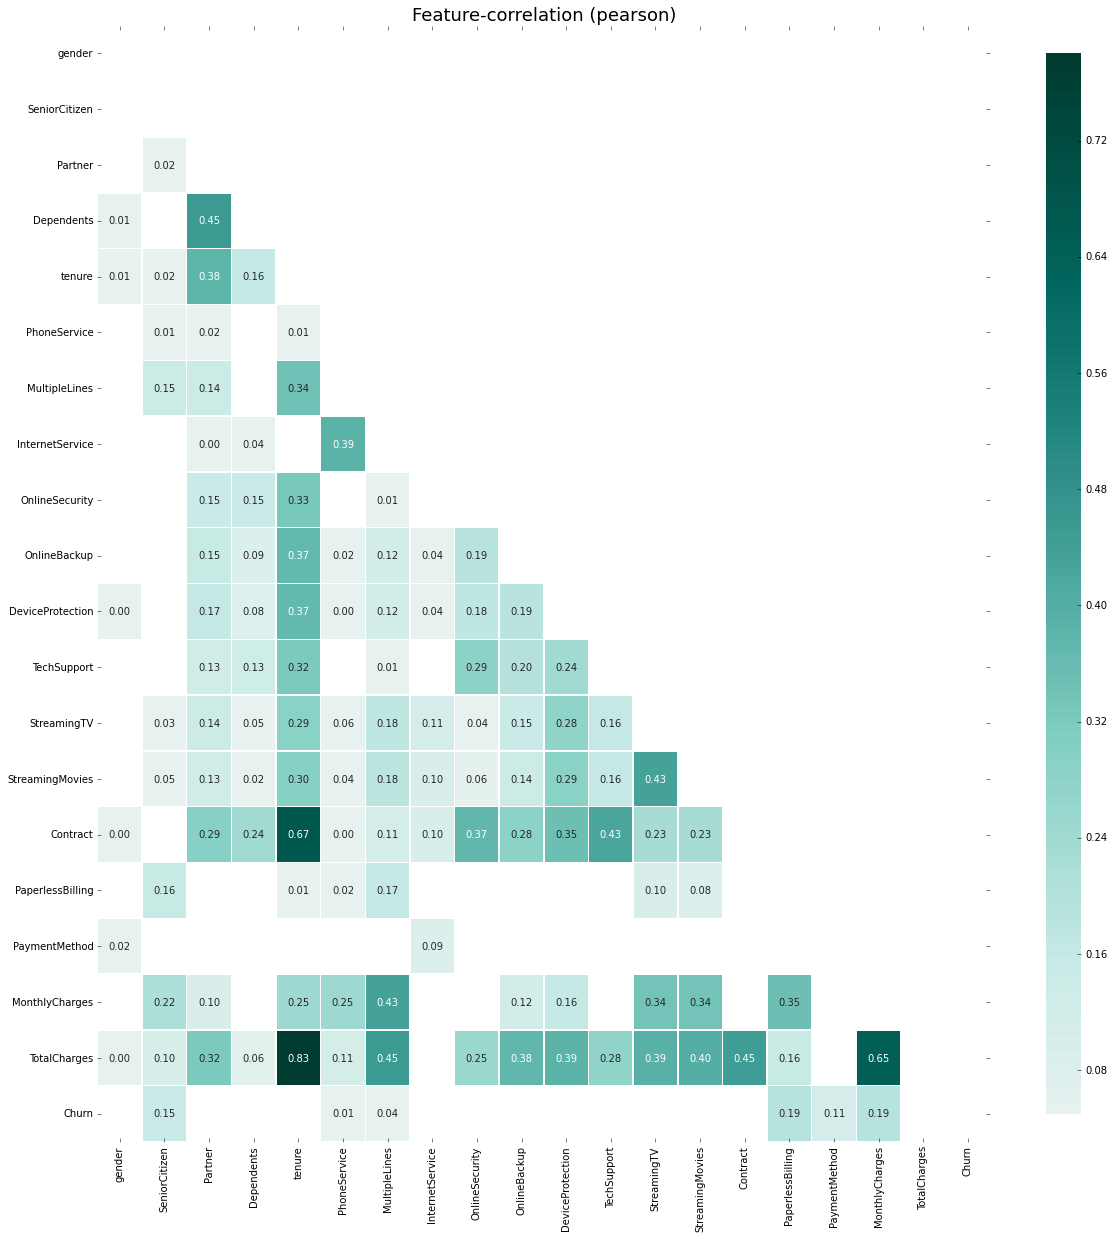

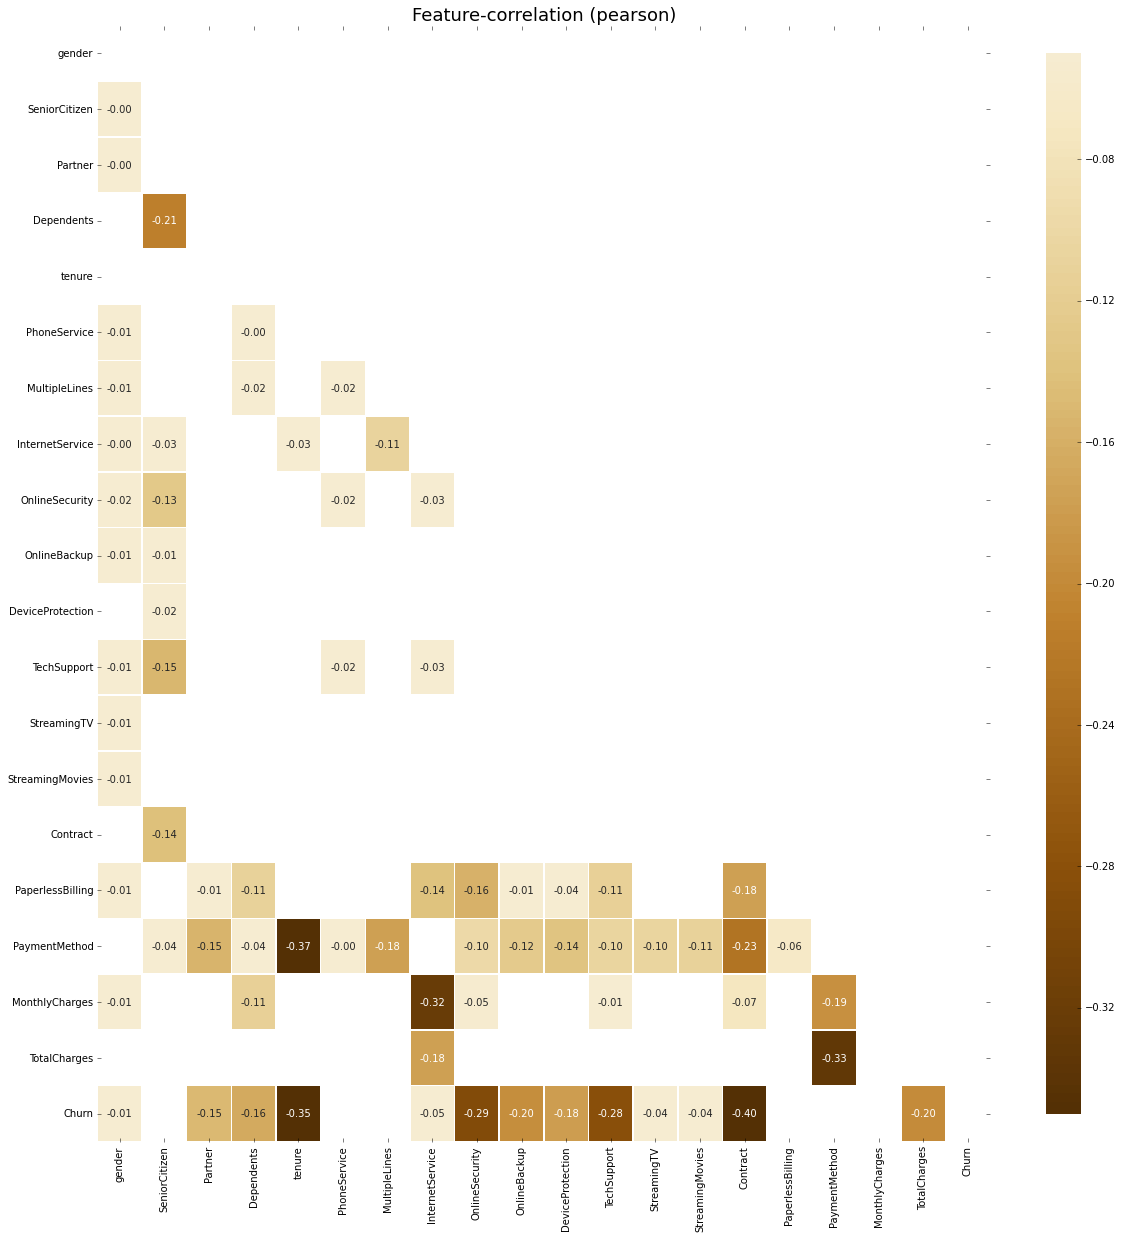

In [27]:
klib.corr_plot(Data_Day, split="pos", figsize=(20,20))
klib.corr_plot(Data_Day, split="neg", figsize=(20,20))

Having a look at we can say that 'gender', 'SeniorCitizen', 'PhoneService', 'PaperlessBilling' has very poor relationship with the rest of the variable, therefore these can be remoived.

In [28]:
Data_Day.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7032.000000,7043.000000
mean,0.504756,0.162147,0.483033,0.299588,32.371149,0.903166,0.940508,0.872923,0.790004,0.906432,0.904444,0.797104,0.985376,0.992475,0.690473,0.592219,1.574329,64.761692,2283.300441,0.265370
std,0.500013,0.368612,0.499748,0.458110,24.559481,0.295752,0.948554,0.737796,0.859848,0.880162,0.879949,0.861551,0.885002,0.885091,0.833755,0.491457,1.068104,30.090047,2266.771362,0.441561
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,35.500000,401.450000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,70.350000,1397.475000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,89.850000,3794.737500,1.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,118.750000,8684.800000,1.000000


In [29]:
Data_Day.drop(['gender', 'SeniorCitizen', 'PhoneService', 'PaperlessBilling'], axis='columns', inplace = True)
Data_Day

,Partner,Dependents,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,1.0,1,0,0,2,0,0,0,0,0,2,29.85,29.85,0
1,0,0,34.0,0,0,2,0,2,0,0,0,1,3,56.95,1889.50,0
2,0,0,2.0,0,0,2,2,0,0,0,0,0,3,53.85,108.15,1
3,0,0,45.0,1,0,2,0,2,2,0,0,1,0,42.30,1840.75,0
4,0,0,2.0,0,1,0,0,0,0,0,0,0,2,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,1,24.0,2,0,2,0,2,2,2,2,1,3,84.80,1990.50,0
7039,1,1,72.0,2,1,0,2,2,0,2,2,1,1,103.20,7362.90,0
7040,1,1,11.0,1,0,2,0,0,0,0,0,0,2,29.60,346.45,0
7041,1,0,4.0,2,1,0,0,0,0,0,0,0,3,74.40,306.60,1


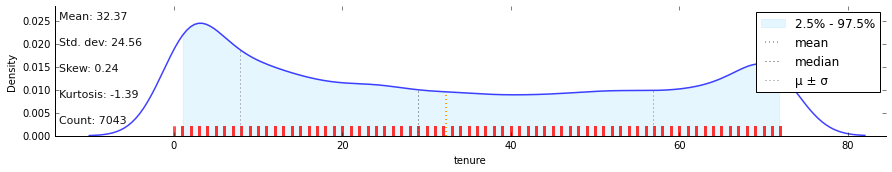

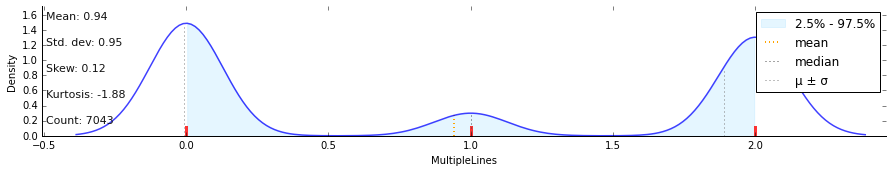

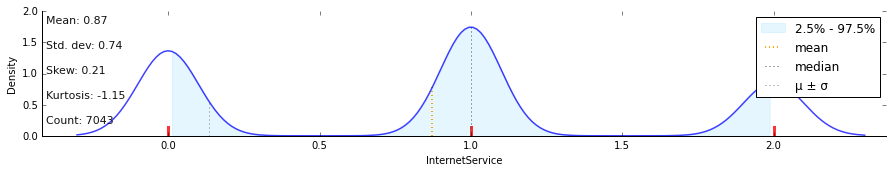

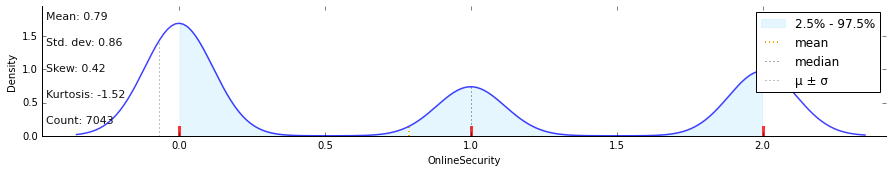

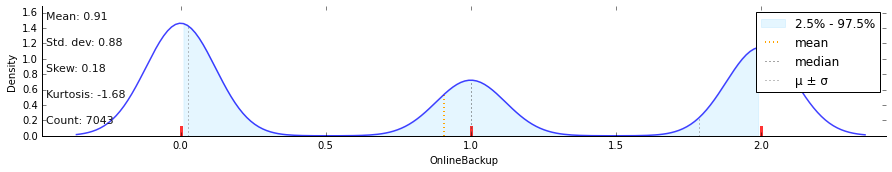

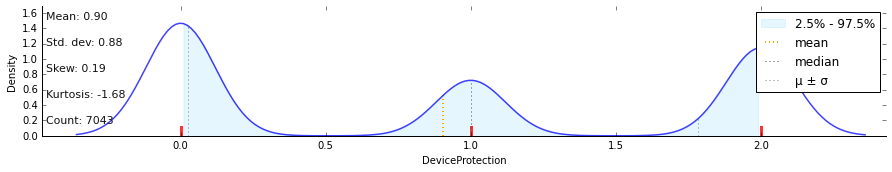

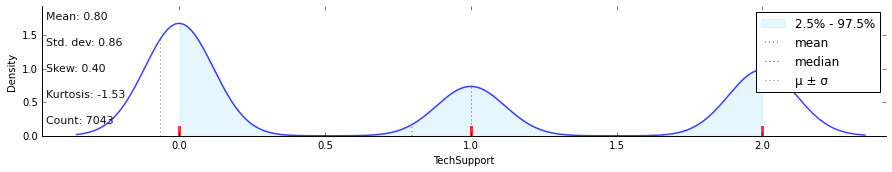

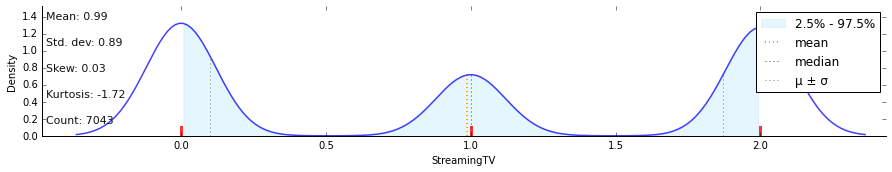

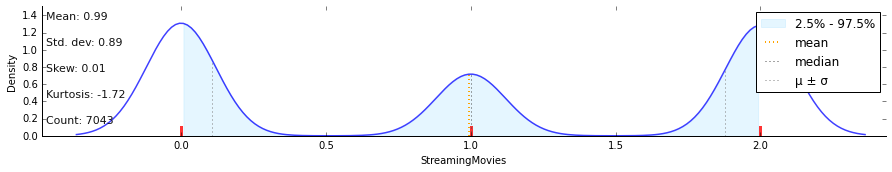

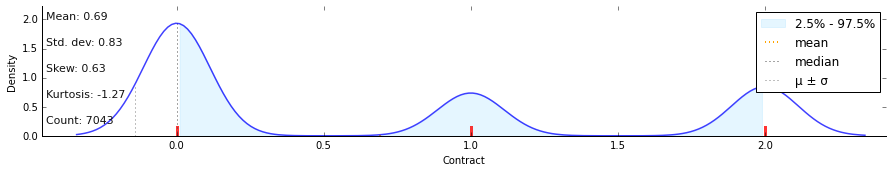

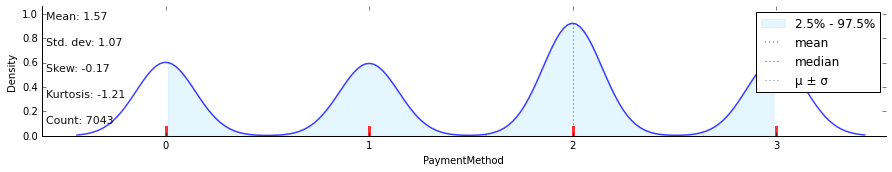

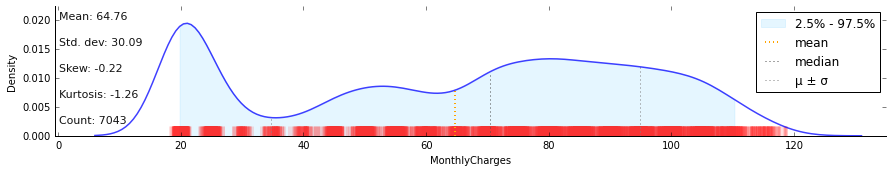

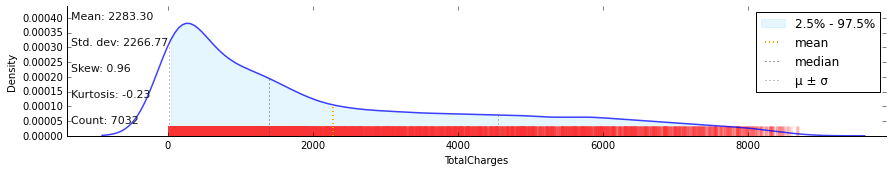

In [30]:
#Feature scalling
klib.dist_plot(Data_Day)

***Here we can eaisly infer that almost every variable is distributed  allmost normely in bell curve, except some nitty gritty deviation in some variable.

In [31]:
!pip install pycaret[Full]==2.3. 4

In [32]:
from pycaret.classification import *
exp1 = setup(Data_Day, target = 'Churn')

,Description,Value
0,session_id,4596
1,Target,Churn
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(7043, 16)"
5,Missing Values,True
6,Numeric Features,3
7,Categorical Features,12
8,Ordinal Features,False
9,High Cardinality Features,False


In [33]:
best_model = compare_models()   ##10 folds fitted & compared models.

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.7988,0.8414,0.5492,0.6443,0.5919,0.4597,0.4630,0.297
ada,Ada Boost Classifier,0.7961,0.8410,0.5088,0.6513,0.5700,0.4392,0.4458,0.272
gbc,Gradient Boosting Classifier,0.7959,0.8429,0.5012,0.6520,0.5658,0.4356,0.4426,0.671
ridge,Ridge Classifier,0.7951,0.0000,0.5065,0.6498,0.5679,0.4365,0.4432,0.027
lda,Linear Discriminant Analysis,0.7941,0.8345,0.5553,0.6296,0.5892,0.4527,0.4549,0.042
catboost,CatBoost Classifier,0.7899,0.8354,0.5050,0.6322,0.5609,0.4251,0.4301,4.250
lightgbm,Light Gradient Boosting Machine,0.7860,0.8307,0.5126,0.6195,0.5603,0.4206,0.4244,0.172
xgboost,Extreme Gradient Boosting,0.7840,0.8200,0.5118,0.6150,0.5579,0.4166,0.4202,4.333
rf,Random Forest Classifier,0.7751,0.8084,0.4683,0.5991,0.5253,0.3809,0.3861,0.801
knn,K Neighbors Classifier,0.7657,0.7512,0.4516,0.5760,0.5056,0.3553,0.3601,0.144


In [34]:
# check the best model
print(best_model)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=4596, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


In [35]:
# predict on hold-out
pred_holdout = predict_model(best_model)  

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.7989,0.8448,0.5305,0.6449,0.5821,0.4513,0.455


In [36]:
ada = create_model('ada')   ##10 folds fitted & compared models.

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7931,0.8505,0.5191,0.6355,0.5714,0.4369,0.4408
1,0.8134,0.8486,0.5878,0.6696,0.6260,0.5024,0.5043
2,0.7890,0.8222,0.5573,0.6134,0.5840,0.4431,0.4440
3,0.7769,0.8076,0.4580,0.6061,0.5217,0.3799,0.3862
4,0.8073,0.8545,0.5038,0.6875,0.5815,0.4602,0.4696
5,0.7890,0.8427,0.4885,0.6337,0.5517,0.4168,0.4228
6,0.7890,0.8274,0.4885,0.6337,0.5517,0.4168,0.4228
7,0.7809,0.8312,0.5115,0.6036,0.5537,0.4099,0.4123
8,0.8154,0.8847,0.4962,0.7222,0.5882,0.4745,0.4884
9,0.8073,0.8408,0.4773,0.7079,0.5701,0.4519,0.4665


In [37]:
tuned_model = tune_model(ada)   ##10 folds fitted & compared models.

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7850,0.8564,0.4427,0.6374,0.5225,0.3895,0.4003
1,0.8134,0.8524,0.5420,0.6893,0.6068,0.4868,0.4928
2,0.7992,0.8270,0.5267,0.6509,0.5823,0.4520,0.4564
3,0.7769,0.8092,0.4351,0.6129,0.5089,0.3699,0.3790
4,0.8093,0.8537,0.4656,0.7176,0.5648,0.4497,0.4670
5,0.7830,0.8351,0.4122,0.6429,0.5023,0.3719,0.3869
6,0.7911,0.8407,0.4427,0.6591,0.5297,0.4020,0.4151
7,0.7992,0.8399,0.4962,0.6633,0.5677,0.4404,0.4483
8,0.8154,0.8820,0.4656,0.7439,0.5728,0.4629,0.4835
9,0.8053,0.8511,0.4394,0.7250,0.5472,0.4325,0.4545


In [38]:
ada_bagged = ensemble_model(tuned_model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7951,0.8537,0.4351,0.6786,0.5302,0.4071,0.4236
1,0.8154,0.8527,0.5496,0.6923,0.6128,0.4937,0.4994
2,0.7951,0.8280,0.5038,0.6471,0.5665,0.4351,0.4409
3,0.7769,0.8097,0.4351,0.6129,0.5089,0.3699,0.3790
4,0.8073,0.8501,0.4504,0.7195,0.5540,0.4393,0.4589
5,0.7708,0.8349,0.3511,0.6216,0.4488,0.3179,0.3386
6,0.7992,0.8425,0.4351,0.6951,0.5352,0.4157,0.4342
7,0.7911,0.8373,0.4504,0.6556,0.5339,0.4052,0.4171
8,0.8174,0.8800,0.4198,0.7971,0.5500,0.4490,0.4853
9,0.8093,0.8501,0.4394,0.7436,0.5524,0.4412,0.4659


***Ensembling is not coming usp with better results therefore we may consider tuned_model for further analysis.***

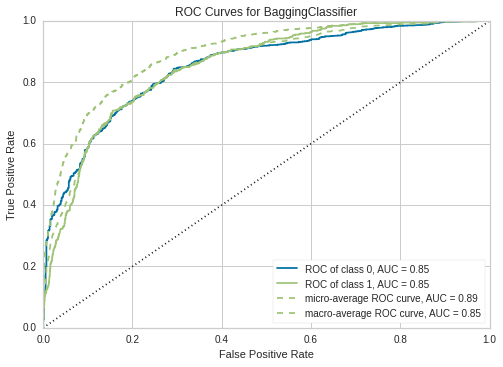

In [39]:
# AUC plot
plot_model(ada_bagged, plot = 'auc')

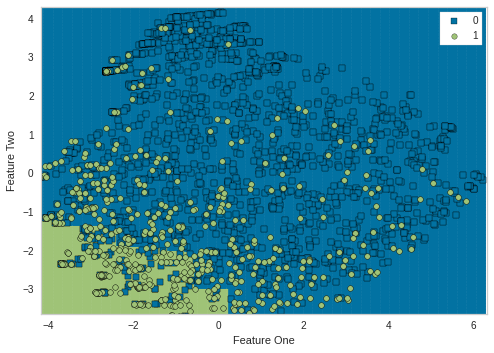

In [40]:
# Decision Boundary
plot_model(ada_bagged, plot = 'boundary')

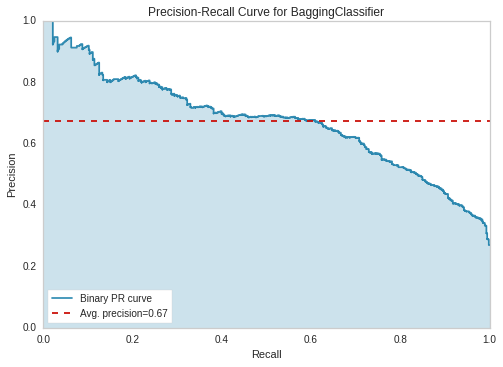

In [41]:
# Precision Recall Curve
plot_model(ada_bagged, plot = 'pr')

In [42]:
# Validation Curve
#plot_model(ada_bagged, plot = 'vc')

In [46]:
evaluate_model(tuned_model) ###Clicking atr various icons wil produce respective graphs

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [44]:
evaluate_model(ada_bagged) ###Clicking atr various icons wilkl produces respective graphs on a live kernel

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

***TypeError:*** This function only supports tree based models for binary classification: xgboost, catboost, rf, et, lightgbm, dt.

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7830,0.8465,0.5038,0.6111,0.5523,0.4108,0.4141
1,0.8093,0.8475,0.5802,0.6609,0.6179,0.4916,0.4934
2,0.7769,0.8201,0.5038,0.5946,0.5455,0.3989,0.4013
3,0.7728,0.8021,0.4733,0.5905,0.5254,0.3785,0.3825
4,0.7972,0.8388,0.4962,0.6566,0.5652,0.4363,0.4435
5,0.7911,0.8349,0.4885,0.6400,0.5541,0.4209,0.4274
6,0.7931,0.8296,0.5191,0.6355,0.5714,0.4369,0.4408
7,0.7789,0.8315,0.5115,0.5982,0.5514,0.4059,0.4081
8,0.8174,0.8719,0.5191,0.7158,0.6018,0.4872,0.4978
9,0.7789,0.8309,0.4545,0.6186,0.5240,0.3844,0.3921


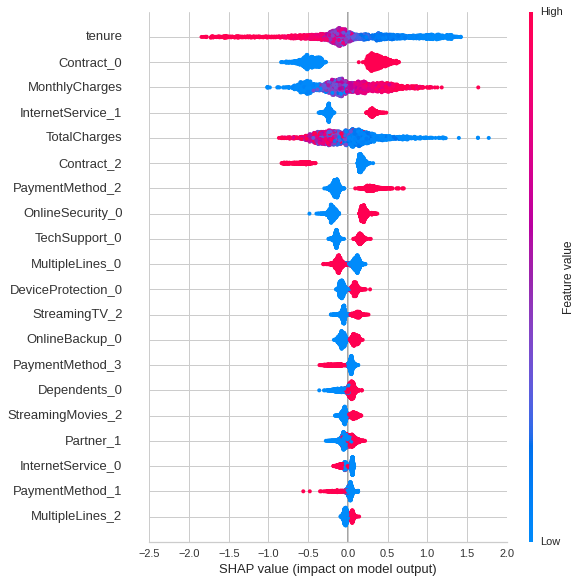

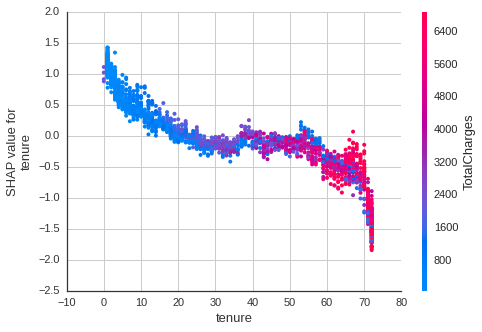

In [49]:
# create a model
catboost = create_model('catboost')
# summary plot
interpret_model(catboost)
# correlation plot
interpret_model(catboost, plot = 'correlation')

In [50]:
# predict test / hold-out dataset
catboost_holdout_pred = predict_model(catboost)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,CatBoost Classifier,0.7984,0.8426,0.5036,0.6535,0.5688,0.4401,0.4465


In [51]:
predictions = predict_model(catboost, data = Data_Day)
predictions

,Partner,Dependents,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Label,Score
0,1,0,1.0,1,0,0,2,0,0,0,0,0,2,29.85,29.85,0,1,0.6084
1,0,0,34.0,0,0,2,0,2,0,0,0,1,3,56.95,1889.50,0,0,0.9665
2,0,0,2.0,0,0,2,2,0,0,0,0,0,3,53.85,108.15,1,0,0.6168
3,0,0,45.0,1,0,2,0,2,2,0,0,1,0,42.30,1840.75,0,0,0.9744
4,0,0,2.0,0,1,0,0,0,0,0,0,0,2,70.70,151.65,1,1,0.7031
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,1,24.0,2,0,2,0,2,2,2,2,1,3,84.80,1990.50,0,0,0.9114
7039,1,1,72.0,2,1,0,2,2,0,2,2,1,1,103.20,7362.90,0,0,0.9405
7040,1,1,11.0,1,0,2,0,0,0,0,0,0,2,29.60,346.45,0,0,0.7232
7041,1,0,4.0,2,1,0,0,0,0,0,0,0,3,74.40,306.60,1,1,0.6722


In [52]:
evaluate_model(catboost)   ###Clicking atr various icons wilkl produces respective graphs on a live kernel

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…